In [1]:
# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 로드
df1 = pd.read_csv('../data/외감_2015_2023_1b.csv')
df2 = pd.read_csv('../data/외감_1999_2006_1b.csv')
df3 = pd.read_csv('../data/외감_2007_2014_1b.csv')

In [3]:
# 데이터 통합
gaap = pd.concat([df1,df2,df3])
# 재정렬
gaap.sort_values(['거래소코드', '회계년도'], inplace=True)
# 인덱스 리셋
gaap.reset_index(drop=True, inplace=True)

In [4]:
# 통합 데이터 확인
gaap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386811 entries, 0 to 386810
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   회사명               386811 non-null  object 
 1   거래소코드             386811 non-null  int64  
 2   회계년도              386811 non-null  object 
 3   산업코드              386811 non-null  int64  
 4   산업명               386811 non-null  object 
 5   종업원               386811 non-null  int64  
 6   자산                386811 non-null  float64
 7   유동자산              386811 non-null  float64
 8   비유동자산             386811 non-null  float64
 9   유형자산              386811 non-null  float64
 10  재고자산              386811 non-null  float64
 11  매출채권              386811 non-null  float64
 12  자본                386811 non-null  float64
 13  자본금               386811 non-null  float64
 14  자본잉여금             386811 non-null  float64
 15  기타포괄손익누계액         386811 non-null  float64
 16  이익잉여금             38

In [5]:
gaap.head()

,회사명,거래소코드,회계년도,산업코드,산업명,종업원,자산,유동자산,비유동자산,유형자산,...,영업이익률,순이익률,부채비율,유동부채비율,비유동부채비율,유동비율,이자보상배율,금융비용부담률,자본유보율,자본잠식률
0,(주)포스코이앤씨,10000,1999/12,64102,종합 건설업,6279,1.060103e+12,3.723489e+11,3.786391e+11,6.365413e+10,...,7.238381,5.377557,106.761663,75.534903,31.226761,118.723255,4.453730,1.625240,103.243156,-79.821927
1,(주)포스코이앤씨,10000,2000/12,64102,종합 건설업,6279,1.074118e+12,3.723489e+11,3.882016e+11,6.705067e+10,...,3.912618,3.123098,103.119711,80.903742,22.215969,110.844682,1.989666,1.966469,103.243156,-79.821927
2,(주)포스코이앤씨,10000,2001/12,64102,종합 건설업,6279,1.091695e+12,3.723489e+11,4.564010e+11,4.972508e+10,...,6.865128,4.624010,97.794749,86.977633,10.817116,103.104087,7.448537,0.921675,103.243156,-79.821927
3,(주)포스코이앤씨,10000,2008/12,64102,종합 건설업,6279,1.143357e+12,4.700015e+11,8.167385e+11,5.395655e+10,...,6.529487,4.955720,174.245899,99.175556,100.375526,103.775840,1.954649,3.340492,238.414928,-199.718223
4,(주)포스코이앤씨,10000,2009/12,64102,종합 건설업,6279,1.143357e+12,4.700015e+11,8.167385e+11,1.815431e+11,...,6.529487,4.955720,174.245899,99.175556,100.375526,103.775840,1.954649,3.340492,238.414928,-199.718223


In [6]:
gaap.describe()

,거래소코드,산업코드,종업원,자산,유동자산,비유동자산,유형자산,재고자산,매출채권,자본,...,영업이익률,순이익률,부채비율,유동부채비율,비유동부채비율,유동비율,이자보상배율,금융비용부담률,자본유보율,자본잠식률
count,386811.000000,386811.000000,386811.000000,3.868110e+05,3.868110e+05,3.868110e+05,3.868110e+05,3.868110e+05,3.868110e+05,3.868110e+05,...,3.865910e+05,3.867190e+05,3.868110e+05,3.868110e+05,3.868030e+05,386811.000000,3.866260e+05,3.831920e+05,3.868110e+05,3.868110e+05
mean,55477.850596,69881.265877,65.547257,5.185825e+10,2.154389e+10,2.954033e+10,1.889415e+10,7.771829e+09,6.039685e+09,1.510738e+10,...,-8.446138e+06,-8.834169e+06,6.006921e+04,1.875174e+04,7.474381e+03,323.586307,-2.969593e+03,1.883850e+06,8.365073e+02,-1.190760e+03
std,27415.012151,43107.227295,272.671434,1.217229e+11,4.891830e+10,8.516306e+10,5.249984e+10,2.247462e+10,1.563589e+10,5.006258e+10,...,4.363349e+07,3.973063e+07,1.155286e+07,3.631691e+06,3.857036e+06,4732.497855,8.271088e+05,8.686254e+06,2.971208e+04,2.948333e+04
min,10000.000000,10100.000000,0.000000,2.946909e+09,2.101385e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.297218e+10,...,-2.969817e+08,-2.492698e+08,-1.922670e+08,-1.147431e+08,-1.216624e+08,0.004640,-4.264275e+06,0.000000e+00,-4.730468e+06,-6.096027e+06
25%,38824.000000,32601.000000,0.000000,1.303215e+10,3.766347e+09,4.901288e+09,1.613070e+09,3.759400e+07,1.482085e+08,1.305668e+09,...,-3.500509e+00,-8.079829e+00,6.244859e+01,3.273380e+01,3.420056e+00,53.096947,-3.857115e-01,8.877574e-01,-2.774367e+01,-1.199421e+03
50%,53873.000000,64101.000000,12.000000,2.048106e+10,8.512792e+09,1.022556e+10,7.245108e+09,1.413661e+09,1.835267e+09,4.964368e+09,...,3.363333e+00,1.430049e+00,1.762881e+02,1.054651e+02,3.125131e+01,97.790236,1.362710e+00,2.442859e+00,2.163875e+02,-2.836015e+02
75%,75895.500000,105802.000000,60.000000,4.084649e+10,1.828272e+10,2.094277e+10,1.502524e+10,5.530175e+09,5.189890e+09,1.234779e+10,...,9.173237e+00,5.782706e+00,3.989428e+02,2.445684e+02,1.126231e+02,151.684196,4.342004e+00,9.046250e+00,1.030572e+03,7.479843e+00
max,116714.000000,209801.000000,21283.000000,1.232728e+12,4.700015e+11,8.992078e+11,6.471876e+11,2.193083e+11,1.622124e+11,5.310694e+11,...,5.604119e+03,3.878590e+06,2.373601e+09,7.376502e+08,2.367920e+09,920575.307933,8.989317e+06,4.879191e+07,6.096111e+06,2.336217e+06


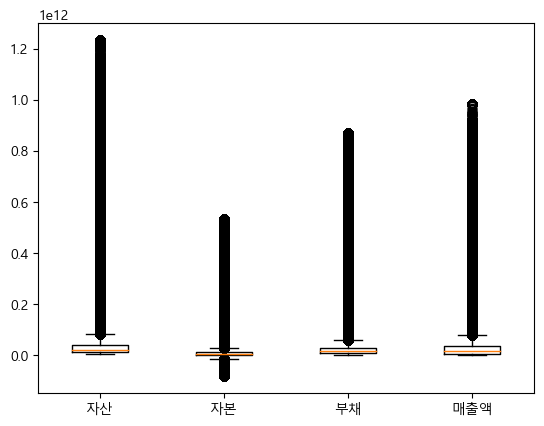

In [7]:
plt.rc('font', family = 'Malgun Gothic')
plt.boxplot([gaap['자산'], gaap['자본'], gaap['부채'], gaap['매출액(영업수익)']], labels = ['자산', '자본', '부채', '매출액'])
plt.show()

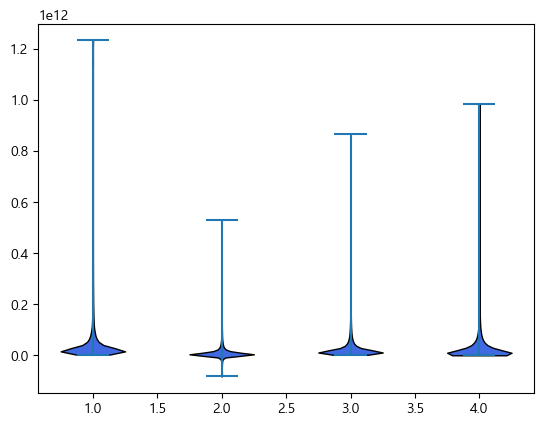

In [8]:
parts = plt.violinplot([gaap['자산'], gaap['자본'], gaap['부채'], gaap['매출액(영업수익)']])
for pc in parts['bodies']:
    pc.set_facecolor('royalblue')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
plt.show()

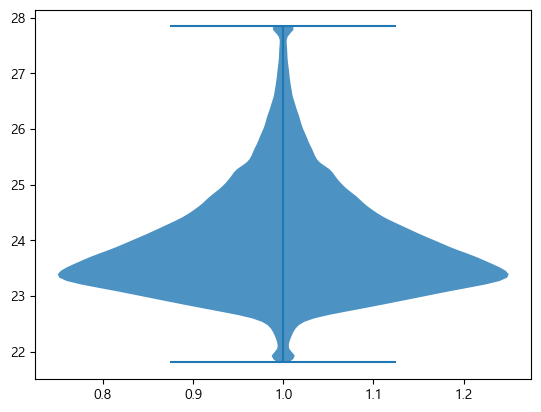

In [9]:
parts = plt.violinplot([np.log(gaap.loc[gaap['자산']>0,'자산'])])
for pc in parts['bodies']:
    pc.set_alpha(0.8)
plt.show()

In [10]:
# 년도 컬럼 생성
gaap['년도'] = gaap['회계년도'].map(lambda x : int(x.split('/')[0]))

In [11]:
# 동적 파생변수 생성
E = (gaap['자본'] + gaap['자본'].shift()) * 0.5
A = (gaap['자산'] + gaap['자산'].shift()) * 0.5
IC = ((gaap['유형자산'] + gaap['유동자산'] - gaap['유동부채']) + (gaap['유형자산'] + gaap['유동자산'] - gaap['유동부채']).shift()) * 0.5
WC = ((gaap['유동자산'] - gaap['유동부채']) + (gaap['유동자산'] - gaap['유동부채']).shift()) * 0.5
P = (gaap['유형자산'] + gaap['유형자산'].shift()) * 0.5
T = (gaap['매출채권'] + gaap['매출채권'].shift()) * 0.5

gaap['ROE'] = (gaap['당기순이익(순손실)']/E) * 100
gaap['ROA'] = (gaap['당기순이익(순손실)']/A) * 100
gaap['ROIC'] = ((gaap['법인세비용차감전(계속사업)손익'] - gaap['(계속사업손익)법인세비용'])/IC) * 100
gaap['매출액증가율'] = ((gaap['매출액(영업수익)'].diff())/(gaap['매출액(영업수익)'].shift())) * 100
gaap['영업이익증가율'] = (gaap['영업이익(손실)'].diff())/(gaap['영업이익(손실)'].shift()) * 100
gaap['순이익증가율'] = (gaap['당기순이익(순손실)'].diff())/(gaap['당기순이익(순손실)'].shift()) * 100
gaap['총자산증가율'] = (gaap['자산'].diff())/(gaap['자산'].shift()) * 100
gaap['유동자산증가율'] = (gaap['유동자산'].diff())/(gaap['유동자산'].shift()) * 100
gaap['유형자산증가율'] = (gaap['유형자산'].diff())/(gaap['유형자산'].shift()) * 100
gaap['자기자본증가율'] = (gaap['자본'].diff())/(gaap['자본'].shift()) * 100
gaap['총자산회전율'] = (gaap['매출액(영업수익)']/A) * 100
gaap['자기자본회전율'] = (gaap['매출액(영업수익)']/E) * 100
gaap['순운전자본회전율'] = (gaap['매출액(영업수익)']/WC) * 100
gaap['유형자산회전율'] = (gaap['매출액(영업수익)']/P) * 100
gaap['매출채권회전율'] = (gaap['매출액(영업수익)']/T) * 100

# 전 인덱스와 연속되지 않는 컬럼 정리
flag = (gaap['거래소코드'] != gaap['거래소코드'].shift()) | ((gaap['년도'] - 1) != gaap['년도'].shift())

gaap.loc[flag, gaap.columns[50 : ]] = 0

# 전기 당기 평균값이 필요한데 전기값이 없는 인덱스는 당기로 대체
gaap.loc[flag, 'ROE'] = (gaap.loc[flag, '당기순이익(순손실)']/gaap.loc[flag, '자본']) * 100
gaap.loc[flag, 'ROA'] = (gaap.loc[flag, '당기순이익(순손실)']/gaap.loc[flag, '자산']) * 100
gaap.loc[flag, 'ROIC'] = ((gaap.loc[flag, '법인세비용차감전(계속사업)손익'] - gaap.loc[flag, '(계속사업손익)법인세비용'])/(gaap.loc[flag, '유형자산'] + gaap.loc[flag, '유동자산'] - gaap.loc[flag, '유동부채'])) * 100
gaap.loc[flag, '총자산회전율'] = (gaap.loc[flag, '매출액(영업수익)']/gaap.loc[flag, '자산']) * 100
gaap.loc[flag, '자기자본회전율'] = (gaap.loc[flag, '매출액(영업수익)']/gaap.loc[flag, '자본']) * 100
gaap.loc[flag, '순운전자본회전율'] = (gaap.loc[flag, '매출액(영업수익)']/(gaap.loc[flag, '유동자산'] - gaap.loc[flag, '유동부채'])) * 100
gaap.loc[flag, '유형자산회전율'] = (gaap.loc[flag,'매출액(영업수익)']/gaap.loc[flag, '유형자산']) * 100
gaap.loc[flag, '매출채권회전율'] = (gaap.loc[flag, '매출액(영업수익)']/gaap.loc[flag, '매출채권']) * 100

# 파생변수 중 음/양 무한대 값을 무한대 제외한 min/max로 치환
for col in gaap.columns[50 : ] :
    gaap.loc[gaap[col].isin([np.inf]), col] = gaap.loc[~gaap[col].isin([np.inf, -np.inf]), col].max()
    gaap.loc[gaap[col].isin([-np.inf]), col] = gaap.loc[~gaap[col].isin([np.inf, -np.inf]), col].min()

# 분모, 분자가 전부 0이어서 nan이 된 파생변수 0으로 치환
gaap.fillna(0, inplace=True)

In [12]:
# 매출액 대비 현금흐름 컬럼 생성
gaap['매출액 대비 영업활동으로 인한 현금흐름'] = gaap['영업활동으로 인한 현금흐름']/gaap['매출액(영업수익)']
gaap['매출액 대비 투자활동으로 인한 현금흐름'] = gaap['투자활동으로 인한 현금흐름']/gaap['매출액(영업수익)']
gaap['매출액 대비 재무활동으로 인한 현금흐름'] = gaap['재무활동으로 인한 현금흐름']/gaap['매출액(영업수익)']

# 파생변수 중 음/양 무한대 값을 무한대 제외한 min/max로 치환
for col in gaap.columns[-3 : ] :
    gaap.loc[gaap[col].isin([np.inf]), col] = gaap.loc[~gaap[col].isin([np.inf, -np.inf]), col].max()
    gaap.loc[gaap[col].isin([-np.inf]), col] = gaap.loc[~gaap[col].isin([np.inf, -np.inf]), col].min()

# 분모, 분자가 전부 0이어서 nan이 된 파생변수 0으로 치환
gaap.fillna(0, inplace=True)

In [13]:
# 새로 생성된 파생변수 확인
gaap.iloc[ : , 50 : ].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386811 entries, 0 to 386810
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ROE                    386811 non-null  float64
 1   ROA                    386811 non-null  float64
 2   ROIC                   386811 non-null  float64
 3   매출액증가율                 386811 non-null  float64
 4   영업이익증가율                386811 non-null  float64
 5   순이익증가율                 386811 non-null  float64
 6   총자산증가율                 386811 non-null  float64
 7   유동자산증가율                386811 non-null  float64
 8   유형자산증가율                386811 non-null  float64
 9   자기자본증가율                386811 non-null  float64
 10  총자산회전율                 386811 non-null  float64
 11  자기자본회전율                386811 non-null  float64
 12  순운전자본회전율               386811 non-null  float64
 13  유형자산회전율                386811 non-null  float64
 14  매출채권회전율                386811 non-nu

In [14]:
gaap.iloc[ : , 50 : ].describe()

,ROE,ROA,ROIC,매출액증가율,영업이익증가율,순이익증가율,총자산증가율,유동자산증가율,유형자산증가율,자기자본증가율,총자산회전율,자기자본회전율,순운전자본회전율,유형자산회전율,매출채권회전율,매출액 대비 영업활동으로 인한 현금흐름,매출액 대비 투자활동으로 인한 현금흐름,매출액 대비 재무활동으로 인한 현금흐름
count,3.868110e+05,386811.000000,3.868110e+05,3.868110e+05,3.868110e+05,3.868110e+05,386811.000000,3.868110e+05,3.868110e+05,3.868110e+05,386811.000000,3.868110e+05,3.868110e+05,3.868110e+05,3.868110e+05,386811.000000,386811.000000,386811.000000
mean,-3.925823e+01,0.073611,5.461498e+01,8.943087e+05,8.494593e+02,-1.976282e+04,7.286806,4.978981e+01,1.407008e+07,1.541690e+02,97.315955,7.635760e+02,1.247735e+02,8.836181e+08,1.140437e+09,-32061.576357,-11084.724424,30419.217407
std,2.778059e+04,16.068320,4.229119e+04,6.758039e+06,7.435437e+05,2.004725e+06,42.485732,4.751310e+03,2.038167e+08,8.931880e+04,133.017351,2.439228e+05,3.099599e+05,4.806253e+09,3.492565e+09,137698.330292,65796.980522,129927.239263
min,-1.158123e+07,-1040.055733,-2.124823e+06,-1.000000e+02,-2.606409e+07,-1.667744e+08,-98.975682,-9.998977e+01,-1.000000e+02,-3.947339e+07,0.000000,-5.558637e+07,-8.501984e+07,0.000000e+00,0.000000e+00,-618007.900000,-319333.742857,-42807.705882
25%,-1.072819e+00,-2.220850,-3.225481e+00,-4.309891e+00,-5.400772e+01,-7.360035e+01,-2.633166,-7.249022e+00,-3.580227e+00,-4.824113e-01,18.257489,3.558417e+01,-3.095144e+02,5.942548e+01,3.998720e+02,-0.064668,-0.173129,-0.045939
50%,7.805894e+00,1.234962,4.064331e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.487753e+00,74.879078,2.041695e+02,0.000000e+00,2.299263e+02,7.293179e+02,0.030290,-0.039100,0.015425
75%,2.369566e+01,4.931323,1.551717e+01,1.644996e+01,2.335718e+01,2.462498e+01,10.446179,1.834320e+01,3.599651e+00,1.701988e+01,133.690577,4.786012e+02,4.683666e+02,8.514212e+02,1.890597e+03,0.125458,0.000000,0.197161
max,3.635275e+06,692.012009,2.594917e+07,5.198966e+07,3.017031e+07,3.373907e+07,5120.678440,2.236527e+06,2.972656e+09,1.711550e+07,20220.084437,1.202491e+08,1.202491e+08,2.707024e+10,1.183712e+10,29118.737226,147034.254902,579533.200000


In [15]:
# Beneish M-Score 생성을 위한 파생변수
gaap['DSRI'] = (gaap['매출채권']/gaap['매출액(영업수익)'])/((gaap['매출채권']/gaap['매출액(영업수익)']).shift())
gaap['GMI']= gaap['매출총이익률']/(gaap['매출총이익률'].shift())
gaap['AQI']= (1 - ((gaap['유동자산'] + gaap['유형자산'])/gaap['자산']))/((1 - ((gaap['유동자산'] + gaap['유형자산'])/gaap['자산'])).shift())
gaap['SGI']= gaap['매출액(영업수익)']/(gaap['매출액(영업수익)'].shift())
gaap['DEPI'] = (gaap['감가상각비']/(gaap['감가상각비'] + gaap['유형자산']))/(gaap['감가상각비']/((gaap['감가상각비'] + gaap['유형자산']).shift()))
gaap['SGAI'] = (gaap['판매비와관리비(영업비용)']/gaap['매출액(영업수익)'])/((gaap['판매비와관리비(영업비용)']/gaap['매출액(영업수익)']).shift())
gaap['LVGI'] = (gaap['부채']/gaap['자산'])/((gaap['부채']/gaap['자산']).shift())
gaap['TATA'] = (gaap['당기순이익(순손실)'] - gaap['영업활동으로 인한 현금흐름'])/gaap['자산']

# 전 인덱스와 연속되지 않는 컬럼 정리
flag = (gaap['거래소코드'] != gaap['거래소코드'].shift()) | ((gaap['년도'] - 1) != gaap['년도'].shift())
gaap.loc[flag, ['DSRI', 'GMI', 'AQI', 'SGI', 'DEPI', 'SGAI', 'LVGI']] = 0

# 파생변수 중 음/양 무한대 값을 무한대 제외한 min/max로 치환
for col in gaap.columns[-8 : ] :
    gaap.loc[gaap[col].isin([np.inf]), col] = gaap.loc[~gaap[col].isin([np.inf, -np.inf]), col].max()
    gaap.loc[gaap[col].isin([-np.inf]), col] = gaap.loc[~gaap[col].isin([np.inf, -np.inf]), col].min()

# 분모, 분자가 전부 0이어서 nan이 된 파생변수 0으로 치환
gaap.fillna(0, inplace=True)

#Beneish M-Score 생성
gaap['Beneish M-Score'] = -4.84 + 0.92*gaap['DSRI']+0.528*gaap['GMI']+0.404*gaap['AQI']+0.892*gaap['SGI']+0.115*gaap['DEPI']-0.172*gaap['SGAI']+4.679*gaap['TATA']-0.327*gaap['LVGI']


In [16]:
gaap.iloc[ : , -9 : ].describe()

,DSRI,GMI,AQI,SGI,DEPI,SGAI,LVGI,TATA,Beneish M-Score
count,3.868110e+05,3.868110e+05,3.868110e+05,386811.000000,3.868110e+05,386811.000000,386811.000000,386811.000000,3.868110e+05
mean,2.728366e+05,-2.133171e+06,7.786836e+05,8943.856763,2.356599e+01,3631.618547,0.822777,-0.028382,-5.533658e+05
std,2.090490e+06,5.677229e+07,1.585870e+07,67580.424625,3.616518e+03,46180.501269,0.594526,0.410138,3.053340e+07
min,0.000000e+00,-1.320244e+09,-2.415948e+08,0.000000,0.000000e+00,0.000000,0.000000,-42.157508,-7.946934e+08
25%,0.000000e+00,0.000000e+00,2.378490e-01,0.183501,0.000000e+00,0.013346,0.784946,-0.073845,-3.984582e+00
50%,8.068393e-01,9.228239e-01,9.228235e-01,0.971319,9.557474e-01,0.915897,0.973138,-0.017061,-2.672301e+00
75%,1.127908e+00,1.061744e+00,1.153307e+00,1.164500,1.032729e+00,1.109765,1.035432,0.036919,-1.894167e+00
max,1.629086e+07,2.006876e+07,1.325706e+08,519897.563333,1.317269e+06,591507.841174,99.795834,14.699044,7.914243e+07


In [17]:
# 데이터 저장
gaap.to_csv('../data/외감_1999_2023.csv', index = False)